## Task 1:

Apply the decision tree algorithm on the provided dataset (diabetes.csv) on Moodle.

Decision tree

In [1]:
# Load the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [2]:
# Load pima-indian-diabetes.csv file into dataframe (df)
df = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
# Display first 5 records
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.shape

(768, 9)

In [9]:
# Use from 'Pregnancy until age' features into X
X = df.iloc[:, [0, 1, 2, 4, 7]].values   # : all observations, columns 0,1,2 & 4

# Store the 'outcome' feature into 'y'   : all observations and -1 is only the last column
y = df.iloc[:,-1].values

# Display X and y 
X, y

(array([[  6, 148,  72,   0,  50],
        [  1,  85,  66,   0,  31],
        [  8, 183,  64,   0,  32],
        ...,
        [  5, 121,  72, 112,  30],
        [  1, 126,  60,   0,  47],
        [  1,  93,  70,   0,  23]], dtype=int64),
 array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
        1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 0, 0, 0,

In [10]:
X.shape, y.shape

((768, 5), (768,))

In [11]:
#Spliting the data set into training and test set

# Load the library 'sklearn.model_selection'
from sklearn.model_selection import train_test_split

# Split the data set into Training and Testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Display the Number of rows and columns before (X, y) and after Splitting (X_train, X_test, y_train, y_test)
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((768, 5), (768,), (576, 5), (192, 5), (576,), (192,))

In [12]:
#Feature scaling

# Load the library 'sklearn.preprocessing'
from sklearn.preprocessing import StandardScaler

# Create and initialise an object by calling a method 'StandardScaler()'
sc = StandardScaler()

# Convert the X_train and X_test into standised format
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Display the trandofrmed values
X_train, X_test

(array([[ 1.50755225, -1.01521454, -0.40451932, -0.71823753, -0.04863985],
        [-0.82986389, -0.09964691, -0.61509602,  0.08374747, -0.88246592],
        [-1.12204091, -0.95207195,  0.54307587, -0.71823753, -0.5489355 ],
        ...,
        [ 0.04666716, -0.85735805, -0.24658679, -0.71823753, -1.04923114],
        [ 2.09190629, -1.14149973,  0.2272108 , -0.71823753,  0.11812536],
        [ 0.33884418,  0.46863645,  0.64836422, -0.71823753,  2.953134  ]]),
 array([[-8.29863892e-01,  2.45762820e+00,  3.32499158e-01,
         -7.18237532e-01, -9.65848531e-01],
        [-5.37686874e-01, -4.46931183e-01,  2.27210805e-01,
          1.34938006e-01, -8.82465924e-01],
        [ 4.66671626e-02, -1.42564141e+00, -4.04519317e-01,
         -7.18237532e-01, -7.15700710e-01],
        [ 3.38844181e-01,  1.41577538e+00,  1.21922451e-01,
          7.74819660e-01,  1.45224707e+00],
        [-1.12204091e+00, -3.20645992e-01, -2.46586786e-01,
         -7.18237532e-01, -2.15405068e-01],
        [-8.298

In [13]:
#Training the Decision Tree Classification model on the Training set

# Load the library 'sklearn.tree'
from sklearn.tree import DecisionTreeClassifier

# Create and initialise a DecisionTreeClassifier
classifier = DecisionTreeClassifier()  # if you removed (max_depth = 4, random_state = 0) will impruve accuracy

# Train the classifier by calling a method 'fit()'
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [1 0]

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       130
           1       0.55      0.58      0.56        62

    accuracy                           0.71       192
   macro avg       0.67      0.67      0.67       192
weighted avg       0.71      0.71      0.71       192



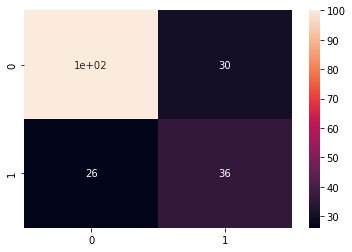

In [15]:
#Making the Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

# print the classification_report based on y_test and y_predict
print(classification_report(y_test, y_pred))

In [16]:
from sklearn import metrics                           # Import scikit-learn metrics module for accuracy calculation
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7083333333333334


[Text(0.6082759030418251, 0.96875, 'X[1] <= 0.737\ngini = 0.459\nsamples = 576\nvalue = [370, 206]'),
 Text(0.3275308935361217, 0.90625, 'X[4] <= -0.424\ngini = 0.372\nsamples = 445\nvalue = [335, 110]'),
 Text(0.17561787072243346, 0.84375, 'X[1] <= 0.2\ngini = 0.21\nsamples = 235\nvalue = [207, 28]'),
 Text(0.08507604562737643, 0.78125, 'X[0] <= 0.923\ngini = 0.164\nsamples = 200\nvalue = [182, 18]'),
 Text(0.07747148288973384, 0.71875, 'X[4] <= -0.924\ngini = 0.156\nsamples = 199\nvalue = [182, 17]'),
 Text(0.015209125475285171, 0.65625, 'X[1] <= -0.573\ngini = 0.055\nsamples = 71\nvalue = [69, 2]'),
 Text(0.0076045627376425855, 0.59375, 'gini = 0.0\nsamples = 48\nvalue = [48, 0]'),
 Text(0.022813688212927757, 0.59375, 'X[1] <= -0.526\ngini = 0.159\nsamples = 23\nvalue = [21, 2]'),
 Text(0.015209125475285171, 0.53125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.030418250950570342, 0.53125, 'X[3] <= -0.339\ngini = 0.087\nsamples = 22\nvalue = [21, 1]'),
 Text(0.022813688212927

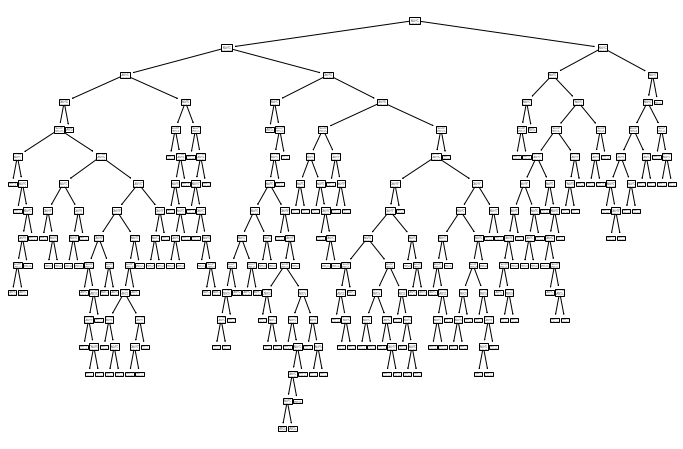

In [17]:
import matplotlib.pyplot as plt
from sklearn import tree

# Set the size of the figure
plt.figure(figsize = (12, 8))

# Display the tree by calling a method plot_tree()
tree.plot_tree(classifier.fit(X_train, y_train))

## Ramdon Forest

In [18]:
#Import scikit-learn dataset library
from sklearn import datasets

In [19]:
# Load pima-indian-diabetes.csv file into dataframe (df)
df = pd.read_csv('pima-indians-diabetes.csv')

In [20]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
df.shape

(768, 9)

In [22]:
# Use from 'Pregnancy until age' features into X
X = df.iloc[:, [0, 1, 2, 4, 7]].values   # : all observations, columns 0,1,2 & 4

# Store the 'outcome' feature into 'y'   : all observations and -1 is only the last column
y = df.iloc[:,-1].values

# Display X and y 
X, y

(array([[  6, 148,  72,   0,  50],
        [  1,  85,  66,   0,  31],
        [  8, 183,  64,   0,  32],
        ...,
        [  5, 121,  72, 112,  30],
        [  1, 126,  60,   0,  47],
        [  1,  93,  70,   0,  23]], dtype=int64),
 array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
        1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 0, 0, 0,

In [23]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [24]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

[[ 0.02790397  0.79424118  1.19833451 -0.68665021  2.28291399]
 [-0.54842029  0.1125728  -0.03947387  1.04929248 -0.30765651]
 [ 1.75687673  0.85621104  0.78573172  1.3202689   1.44724609]
 ...
 [-0.26025816  0.85621104 -0.14262457 -0.68665021 -0.97619083]
 [ 0.02790397  0.94916582  1.09518381 -0.68665021  0.19374423]
 [-0.54842029 -0.25924632  0.47627962  0.49887163 -0.80905725]]
[[ 1.4687146  -0.25924632  0.68258102  0.79525209  0.19374423]
 [-0.26025816  0.05060294  0.47627962 -0.68665021  0.5280114 ]
 [ 0.31606609 -0.47614081  0.16682753  2.06545406 -0.47479009]
 ...
 [ 0.02790397  1.94068347 -3.54659762 -0.68665021  0.19374423]
 [ 0.60422822 -0.47614081  0.06367683 -0.11082532  0.27731103]
 [ 0.31606609 -0.38318603  0.16682753 -0.05154923 -0.05695614]]


In [25]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators = 100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [26]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


              precision    recall  f1-score   support

           0       0.81      0.86      0.83       156
           1       0.67      0.59      0.62        75

    accuracy                           0.77       231
   macro avg       0.74      0.72      0.73       231
weighted avg       0.76      0.77      0.77       231



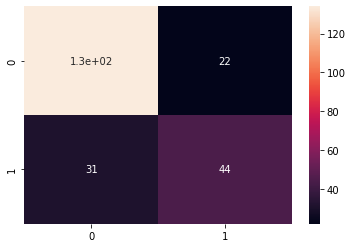

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

# print the classification_report based on y_test and y_predict
print(classification_report(y_test, y_pred))

In [28]:
##another way to do it

# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [29]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]

In [30]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[137  19]
 [ 37  38]]


In [31]:
accuracy_score(y_test, y_pred)

0.7575757575757576

#Analisis result: Using either DT or RF models, accuracy levels are acceptable. Both models could have been performed to test this data set

#Random forest 

#Task 2
#Apply RandomForest Classifier method for the feature selection for the dataset (car_evaluation.csv) provided on Moodle.

In [32]:
!pip install --upgrade category_encoders

In [33]:
#Import scikit-learn dataset library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import category_encoders as ce 

In [34]:
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [35]:
# Load pima-indian-diabetes.csv file into dataframe (df)
df = pd.read_csv('car_evaluation.csv')

In [36]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [37]:
df.describe()

,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [39]:
df.shape

(1727, 7)

In [40]:
# Rename column names We can see that the dataset does not have proper column names.
cols=['buying','maint','doors','person','lug_boot','safety','class']
df=pd.read_csv('car_evaluation.csv',names=cols,header=None)
df.head()

,buying,maint,doors,person,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [41]:
df.shape

(1728, 7)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   person    1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [43]:
df.describe()

,buying,maint,doors,person,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [44]:
df.isnull().sum()

buying      0
maint       0
doors       0
person      0
lug_boot    0
safety      0
class       0
dtype: int64

In [45]:
X=df[['buying','maint','doors','person','lug_boot','safety']]
X.head()

,buying,maint,doors,person,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [46]:
y=df[['class']]
y.head()

,class
0,unacc
1,unacc
2,unacc
3,unacc
4,unacc


In [47]:
# encode variables with ordinal encoding
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['buying','maint','doors','person','lug_boot','safety'])
X = encoder.fit_transform(X)

In [48]:
X

,buying,maint,doors,person,lug_boot,safety
0,1,1,1,1,1,1
1,1,1,1,1,1,2
2,1,1,1,1,1,3
3,1,1,1,1,2,1
4,1,1,1,1,2,2
...,...,...,...,...,...,...
1723,4,4,4,3,2,2
1724,4,4,4,3,2,3
1725,4,4,4,3,3,1
1726,4,4,4,3,3,2


In [49]:
# split dataset as train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# Display the Number of rows and columns before (X, y) and after Splitting (X_train, X_test, y_train, y_test)
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1728, 6), (1728, 1), (1296, 6), (432, 6), (1296, 1), (432, 1))

In [50]:
# fitting model

rf=RandomForestClassifier(n_estimators = 100)
rf.fit(X_train,y_train)
#prediction
y_pred=rf.predict(X_test)

In [51]:
#accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9675925925925926
